In [1]:
from super_gradients.training import models
from super_gradients.common.object_names import Models

The console stream is logged into /Users/rahulmahajan/sg_logs/console.log


[2023-08-13 21:24:53] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-08-13 21:24:56] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
/Users/rahulmahajan/Desktop/YOLO Udem Course/ProjectYoloNas/venv/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-08-13 21:25:49] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-13 21:25:49] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-13 21:25:49] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-13 21:25:49] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-13 21:25:49] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not 

In [9]:
best_model = models.get('yolo_nas_s',
                        num_classes=1,
                        checkpoint_path="chpt_best.pth")

[2023-08-13 21:46:03] INFO - checkpoint_utils.py - Successfully loaded model weights from chpt_best.pth EMA checkpoint.


In [10]:
# #!pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="VfC0B3wpJ8U1GGqhh8NI")
# #rf = Roboflow(api_key="IuYv6KOKs5p62rFSLvGa")
# # project = rf.workspace("lemons").project("number-plates-i91pc")
# # dataset = project.version(10).download("yolov5-obb")

# project = rf.workspace("moin").project("car_license_plates")
# dataset = project.version(1).download("yolov5")

User provided device_type of 'cuda', but CUDA is not available. Disabling
[2023-08-13 21:46:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


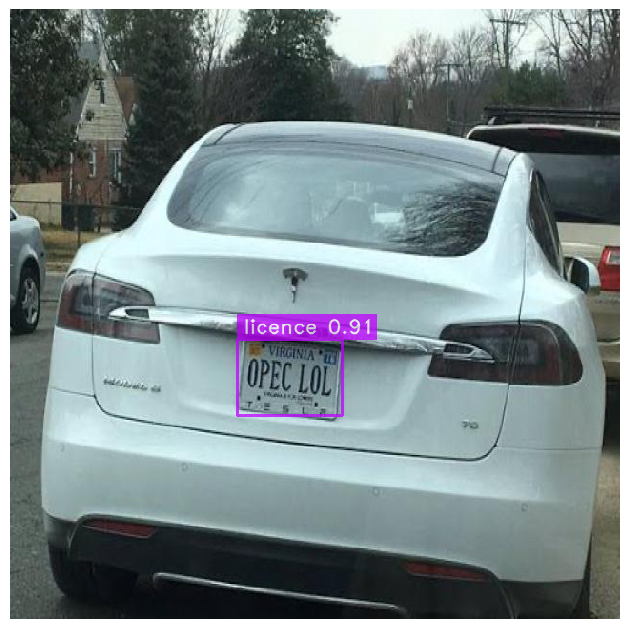

In [11]:
img_url= '/Users/rahulmahajan/Desktop/YOLO Udem Course/ProjectYoloNas/Car_License_Plates-1/test/images/Cars129_png.rf.881823a221699ef0677915cea761bdbf.jpg'
best_model.predict(img_url).show()

In [8]:
#!pip install gdown
!gdown "https://drive.google.com/uc?id=1P-oVR0J35Dw40lzw47sE19oADSW-tyb1&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1P-oVR0J35Dw40lzw47sE19oADSW-tyb1&confirm=t
To: /Users/rahulmahajan/Desktop/YOLO Udem Course/ProjectYoloNas/demo.mp4
100%|██████████████████████████████████████| 9.56M/9.56M [00:01<00:00, 8.77MB/s]


In [12]:
input_video_path = "demo.mp4"
output_video_path = "detections.mp4"

import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"
best_model.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████| 631/631 [10:58<00:00,  1.04s/it]


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov7/runs/detect/exp/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)